# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
startup = pd.read_csv("50_Startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [4]:
startup1= startup.rename(columns={"R&D Spend":"RDSpend","Marketing Spend":"MarketingSpend"},inplace=False)
startup1

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup1.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
import seaborn as sns

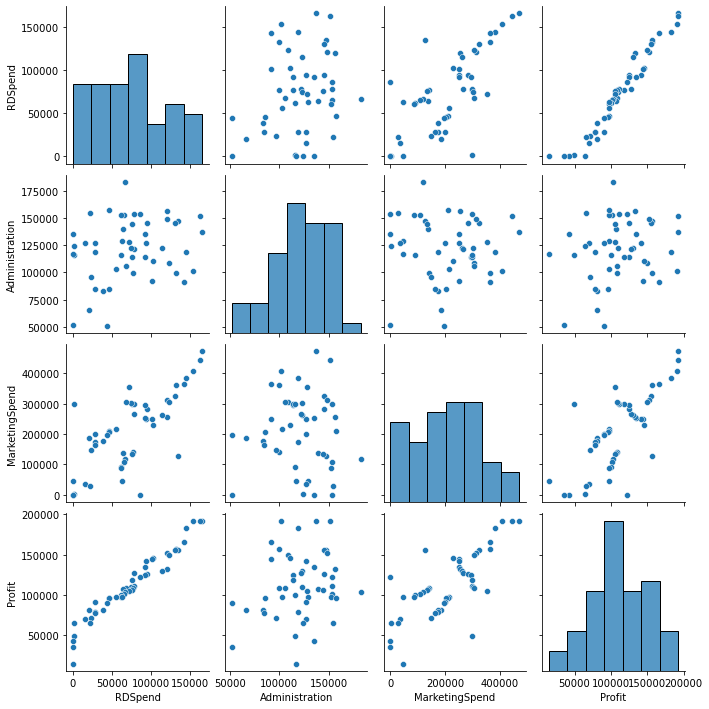

In [7]:
sns.pairplot(startup1)

In [8]:
#Build a model

In [9]:
startmodel = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=startup1).fit()


In [10]:
startmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.53e-30
Time:                        12:24:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#P value for the administration coefficient is high so checking the Profit vs Administration relationship

In [12]:
admimodel = smf.ols('Profit~RDSpend',data= startup1).fit()

In [13]:
admimodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           3.50e-32
Time:                        12:24:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDSpend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# We found that p value is low for this meaning null hypothesis is false so aplha for this is not equal to zero

In [15]:
#Testing of the assumptions
#Test Assumption 1

In [16]:
rh_RD = smf.ols('RDSpend~Administration+MarketingSpend',data=startup1).fit().rsquared
vif_RD = 1/(1-rh_RD)

rh_Adm = smf.ols('Administration~RDSpend+MarketingSpend',data=startup1).fit().rsquared
vif_Adm = 1/(1-rh_Adm)

rh_mrk = smf.ols('MarketingSpend~RDSpend+Administration',data=startup1).fit().rsquared
vif_mrk = 1/(1-rh_mrk)

data1 = {'variables':["RDSpend","Administration","MarketingSpend"],'vif':[vif_RD,vif_Adm,vif_mrk]}
vif_frame = pd.DataFrame(data1)
vif_frame

,variables,vif
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


In [17]:
# so vif is less than 20 first assumption is satisfied

In [18]:
#test assumption 3

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


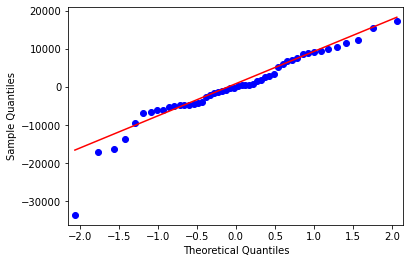

In [19]:
import statsmodels.api as sm
qqplot = sm.qqplot(startmodel.resid,line='q')
plt.show()

In [21]:
#test assumption 4 and assumption 2 in combination

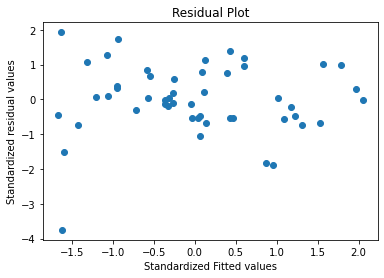

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(startmodel.fittedvalues),get_standardized_values(startmodel.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [23]:
# this is random plot we are getting so we can say that assumption 4 and 2 is satisfied as variance not changing and also 
# there is no need to check error vs seperate features as in combination it is not giving us any relation 

In [24]:
#Test Assumption no 5 as linear relation between y and features along with others

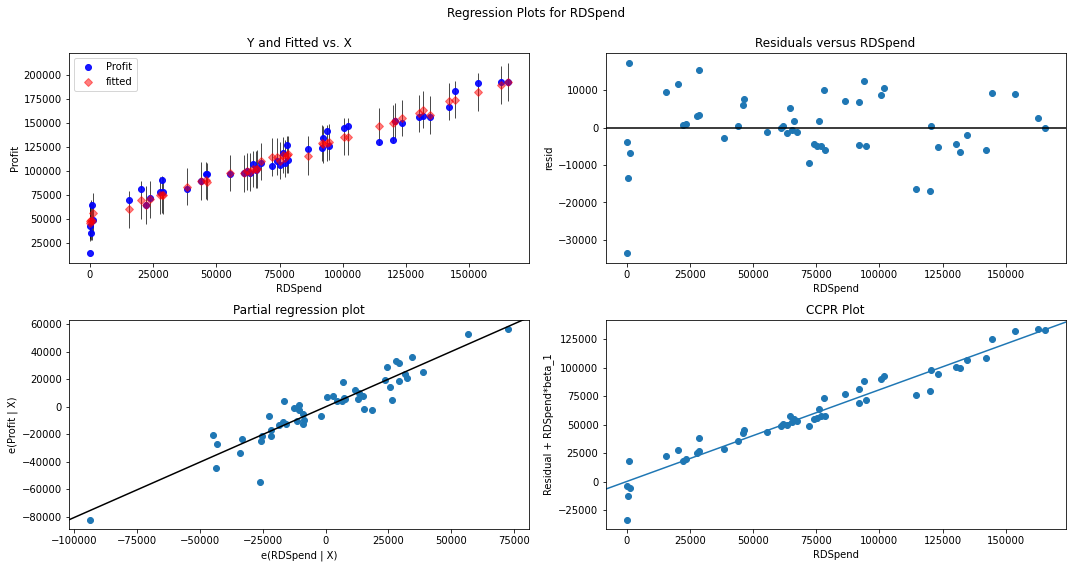

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startmodel, "RDSpend", fig=fig)
plt.show()

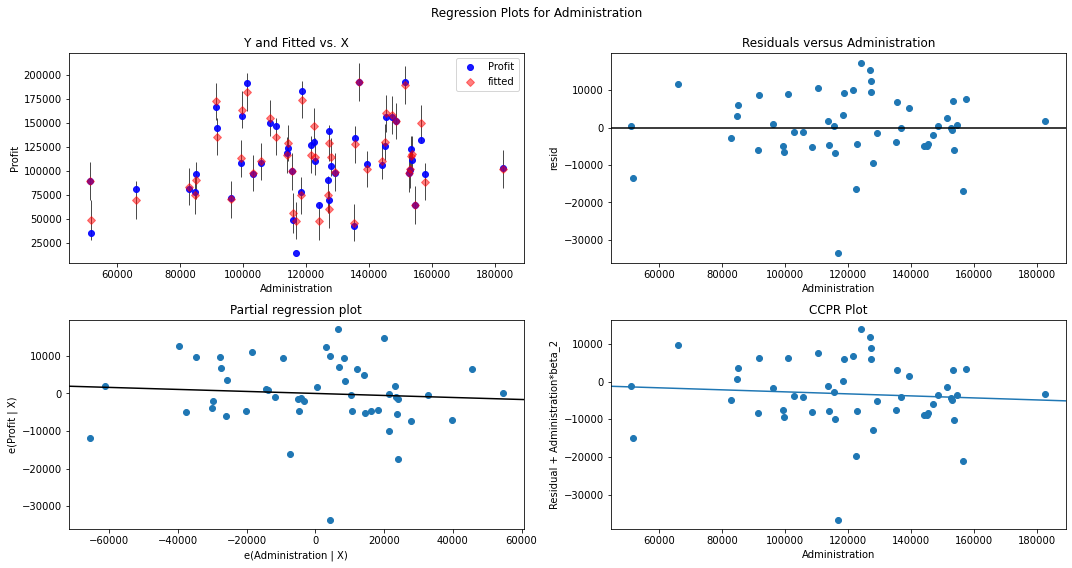

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startmodel, "Administration", fig=fig)
plt.show()

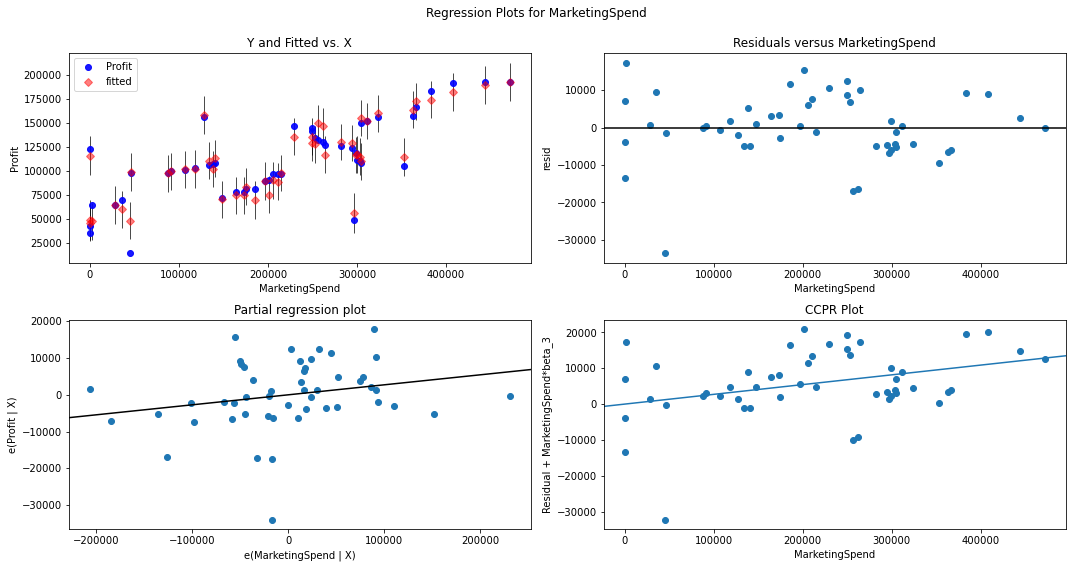

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startmodel, "MarketingSpend", fig=fig)
plt.show()

In [28]:
#Detection of the outliers

In [29]:
startmodel_influence = startmodel.get_influence() #np.round(c,3)
(c,_) = startmodel_influence.cooks_distance


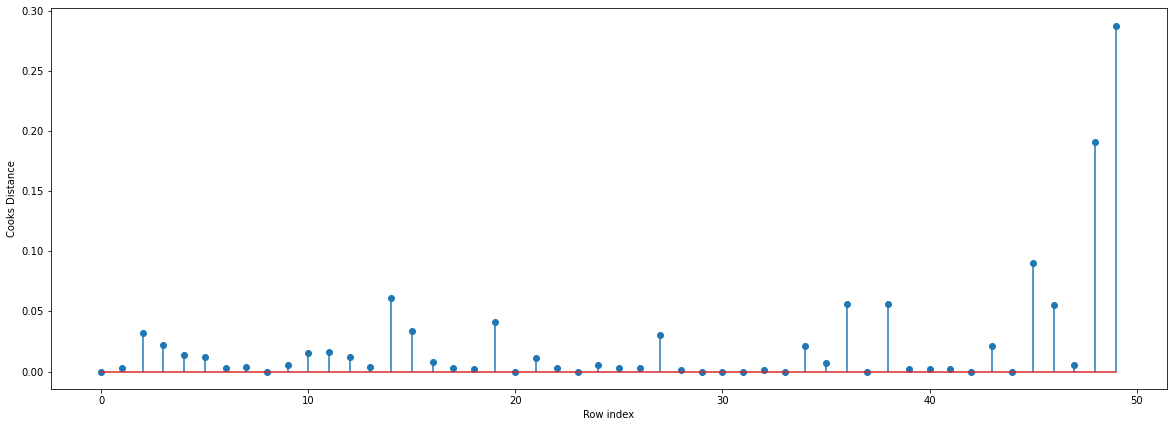

In [30]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [32]:
k = startup1.shape[1]
n = startup1.shape[0]
leverage_cutoff = 3*((3 + 1)/n)
leverage_cutoff

0.24

In [33]:
# looking at graph point no 49(index49) is value greater than 0.24 so we need to delete this point

In [34]:
#improving the model

In [35]:
startup_new= startup1
startup_new1 = startup_new.drop(startup_new.index[[49]],axis=0)

In [36]:
startup_new1

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
#creating new model droping the administration column
startup_newmodel=smf.ols('Profit~RDSpend+MarketingSpend',data=startup_new1).fit()

In [38]:
startup_newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           3.74e-33
Time:                        12:24:58   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDSpend            0.7754      0.035     22.136      0.000       0.705       0.846
MarketingSpend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


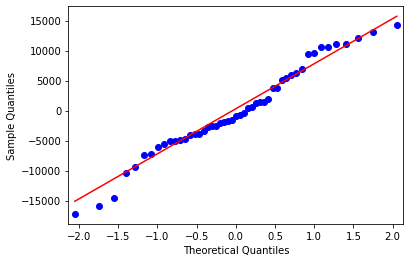

In [39]:
#test assumption 3
import statsmodels.api as sm
qqplot = sm.qqplot(startup_newmodel.resid,line='q')
plt.show()

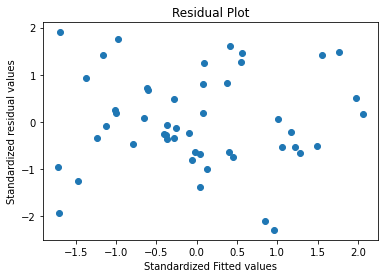

In [40]:
#test assumption 4 and 2
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(startup_newmodel.fittedvalues),get_standardized_values(startup_newmodel.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [41]:
startupmodelnew_influence = startup_newmodel.get_influence() #np.round(c,3)
(c,_) = startupmodelnew_influence.cooks_distance

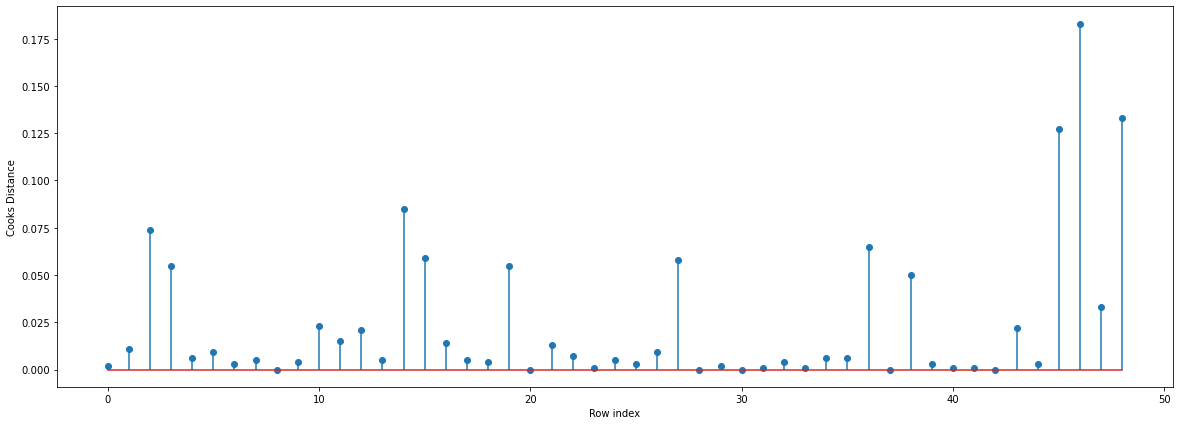

In [42]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup_new1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
k = startup_new1.shape[1]
n = startup_new1.shape[0]
leverage_cutoff = 3*((2 + 1)/n)
leverage_cutoff

0.18367346938775508

In [44]:
startup_new2 = startup_new1.drop(startup_new1.index[[46]],axis=0).reset_index()

In [45]:
startup_new2

,index,RDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
startup_newmodel2= smf.ols('Profit~RDSpend+MarketingSpend',data=startup_new2).fit()

In [47]:
startup_newmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           2.94e-32
Time:                        12:25:04   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
RDSpend            0.7512      0.039     19.431      0.000       0.673       0.829
MarketingSpend     0.0353      0.014      2.511      0.016       0.007       0.064
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

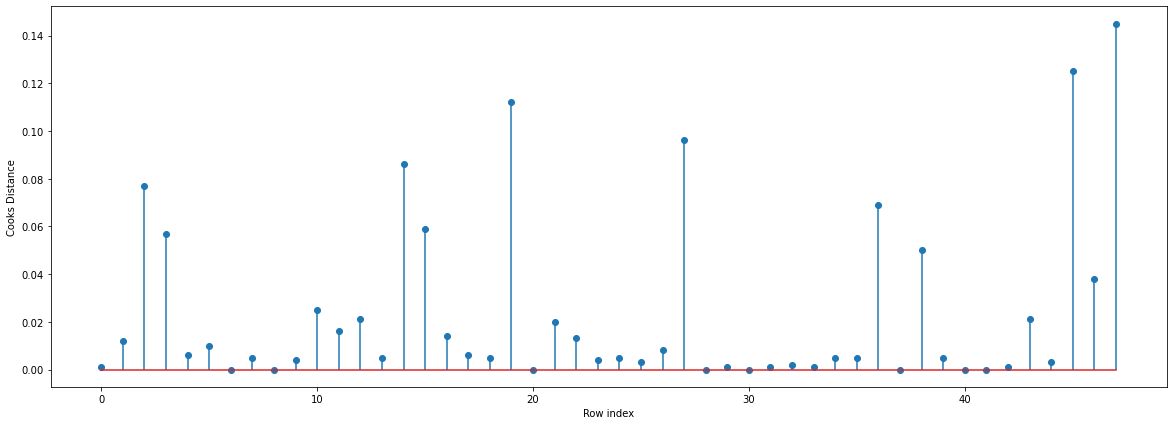

In [48]:
startupmodelnew2_influence = startup_newmodel2.get_influence() #np.round(c,3)
(c,_) = startupmodelnew2_influence.cooks_distance
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup_new2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
k = startup_new2.shape[1]
n = startup_new2.shape[0]
leverage_cutoff = 3*((2 + 1)/n)
leverage_cutoff

0.1875

In [50]:
#new data for prediction
new_data = pd.DataFrame({"RDSpend":165349.20,"MarketingSpend":471784.10},index=[1])
new_data

,RDSpend,MarketingSpend
1,165349.2,471784.1


In [51]:
startup_newmodel2.predict(new_data)

1    191028.251047
dtype: float64

# Consider only the below columns and prepare a prediction model for predicting Price. Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
import pandas as pd

In [3]:
toy= pd.read_csv("Toyota_corolla.csv",encoding='ISO-8859-1')
toy

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
toyota= toy[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [6]:
import seaborn as sns

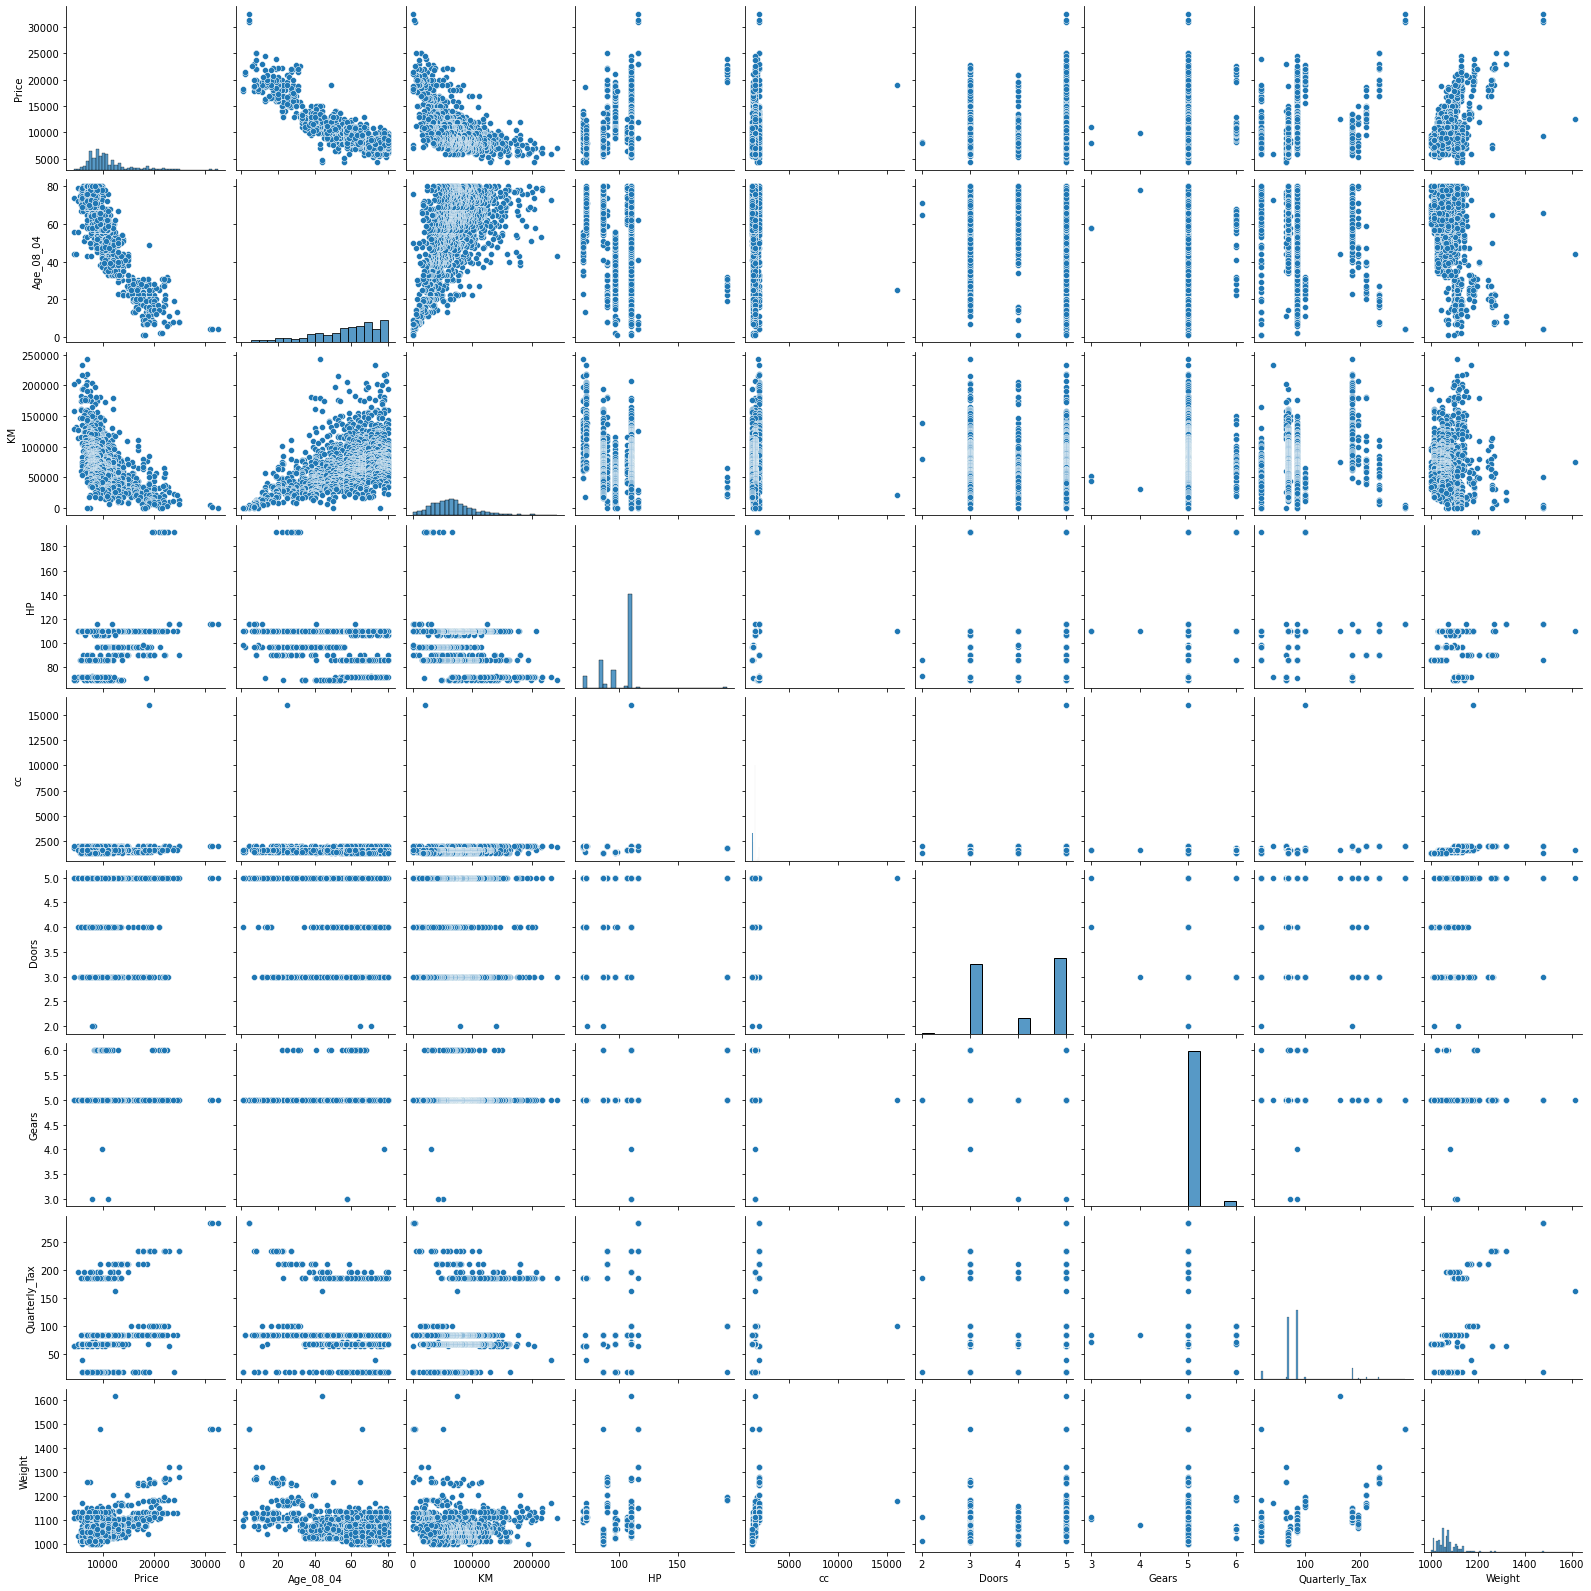

In [7]:
sns.pairplot(toyota)

In [8]:
toyotamodel = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [9]:
toyotamodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:51:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#cc and doors have high probability that null matrix is true so we are checking relationship between the Price vs doors and price vs cc

In [11]:
ccmodel = smf.ols('Price~cc',data=toyota).fit()

In [12]:
ccmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.55e-06
Time:                        16:51:17   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

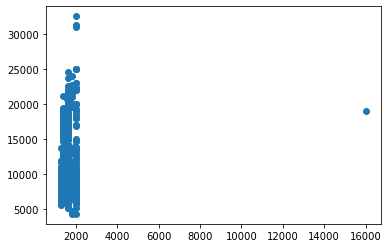

In [13]:
plt.scatter(toyota.cc.values,toyota.Price.values)

In [14]:
doors = smf.ols('Price~Doors',data=toyota).fit()

In [15]:
doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.46e-12
Time:                        16:51:19   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

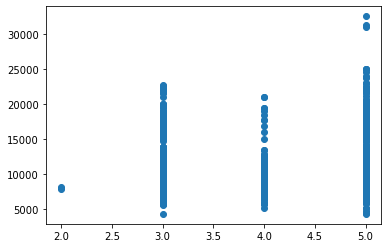

In [16]:
plt.scatter(toyota.Doors.values,toyota.Price.values)

In [17]:
#Since we dont have direct relationship between the cc and price and doors and price so we are droppping these columns

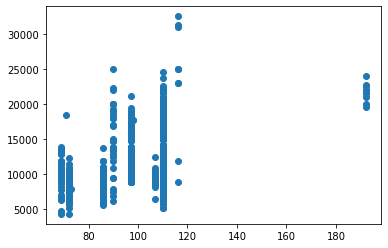

In [18]:
plt.scatter(toyota.HP.values,toyota.Price.values)

In [19]:
# creating new model exclusing both the columns
toyotamodel2 = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=toyota).fit()

In [20]:
toyotamodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:51:22   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#checking of first assumption
rh_age84 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_age84 = 1/(1-rh_age84)

rh_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_KM = 1/(1-rh_KM)

rh_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_HP = 1/(1-rh_HP)

rh_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_cc = 1/(1-rh_cc)

rh_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_Doors = 1/(1-rh_Doors)

rh_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota).fit().rsquared
vif_Gears = 1/(1-rh_Gears)

rh_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_Quarterly_Tax = 1/(1-rh_Quarterly_Tax)

rh_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota).fit().rsquared
vif_Weight = 1/(1-rh_Weight)

data1 = {'variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'vif':[vif_age84,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
vif_frame = pd.DataFrame(data1)
vif_frame

,variables,vif
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [22]:
# so vif is less than 20, first assumption is satisfied

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


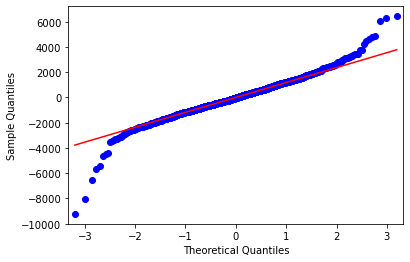

In [23]:
import statsmodels.api as sm
qqplot = sm.qqplot(toyotamodel2.resid,line='q')
plt.show()

In [24]:
#test assumption 4 and assumption 2 in combination

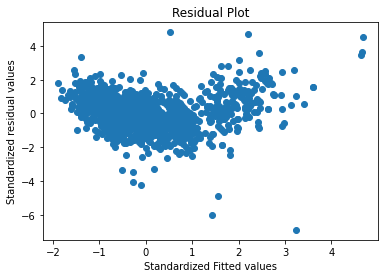

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(toyotamodel2.fittedvalues),get_standardized_values(toyotamodel2.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [26]:
# this is random plot we are getting so we can say that assumption 4 and 2 is satisfied as variance not changing and also 
# there is no need to check error vs seperate features as in combination it is not giving us any relation 

In [27]:
#Test Assumption no 5 as linear relation between y and features along with others

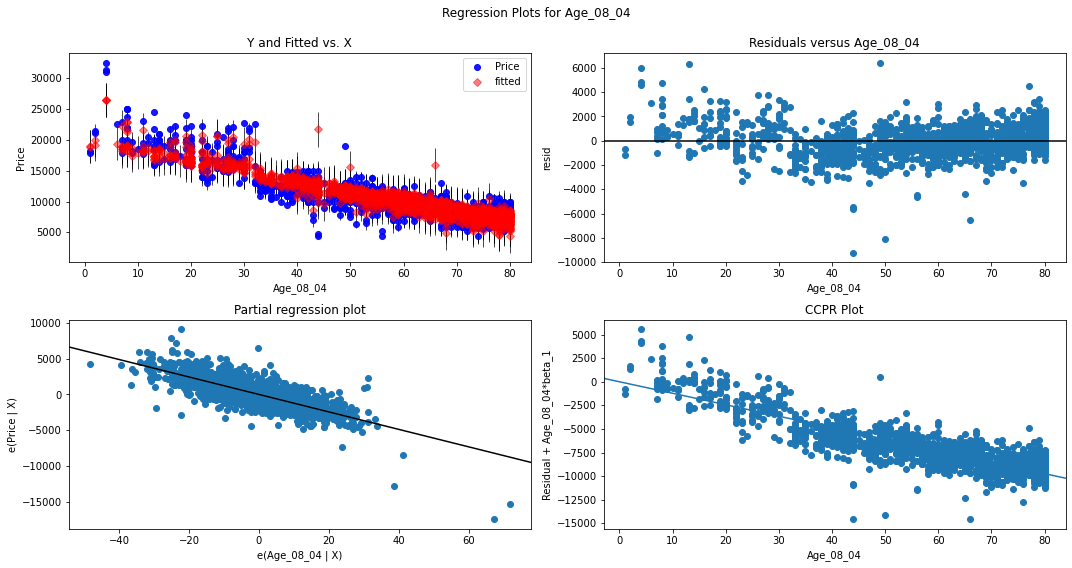

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel2, "Age_08_04", fig=fig)
plt.show()

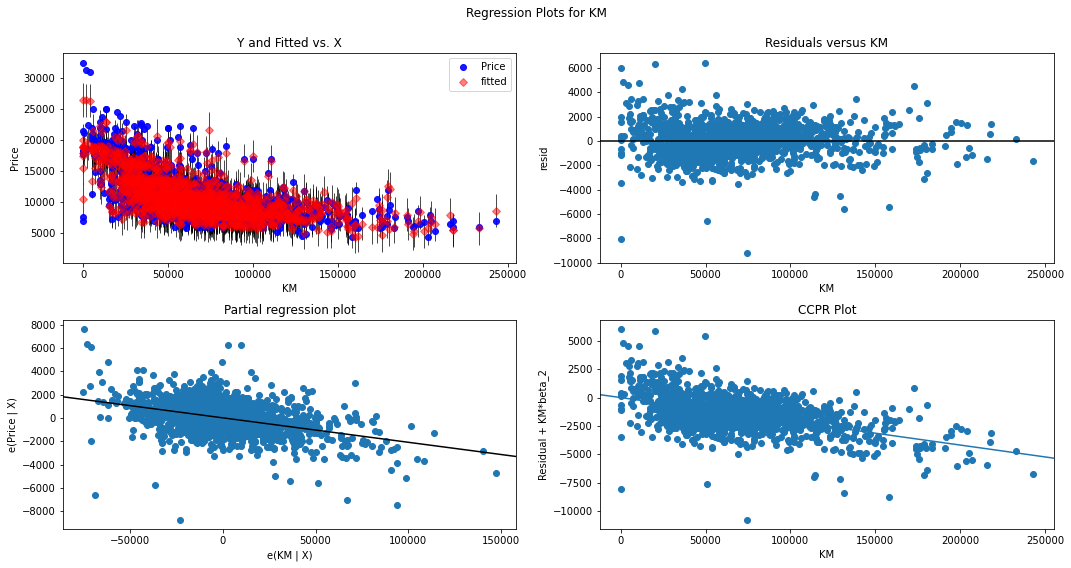

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel2, "KM", fig=fig)
plt.show()

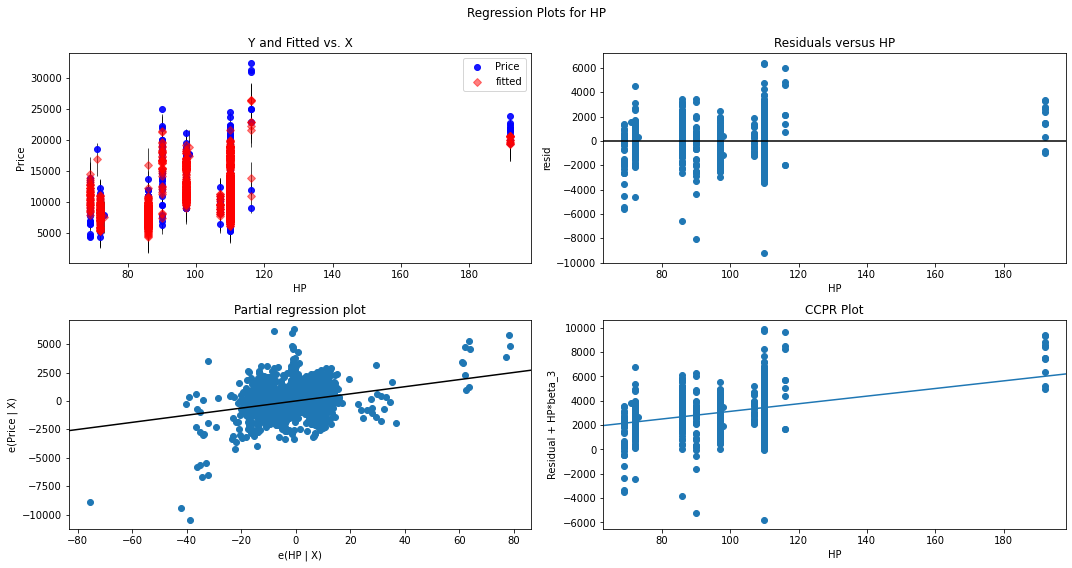

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel2, "HP", fig=fig)
plt.show()

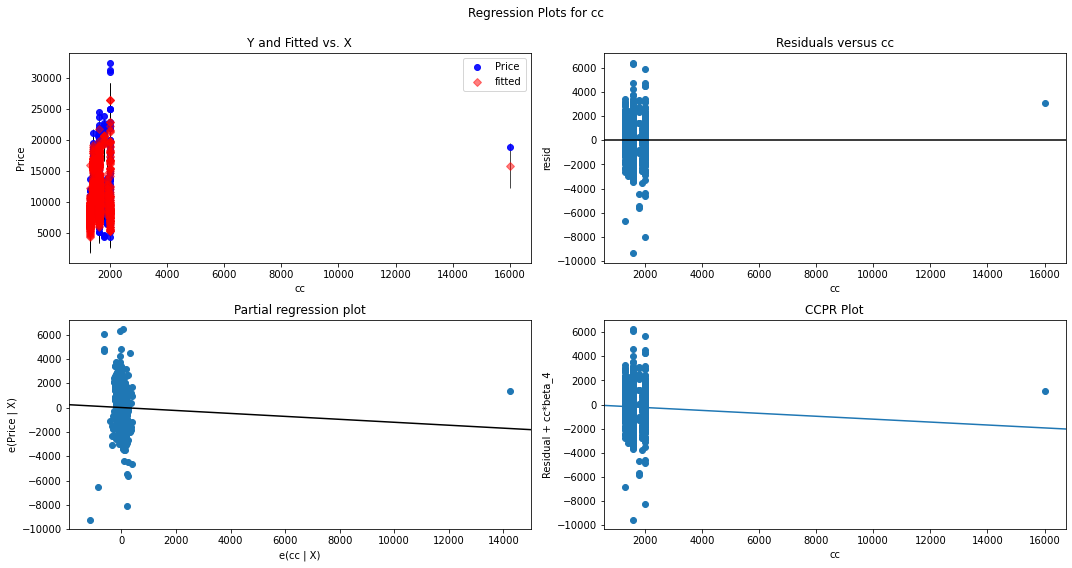

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel, "cc", fig=fig)
plt.show()

In [32]:
#signifiant relation is not there with cc and price

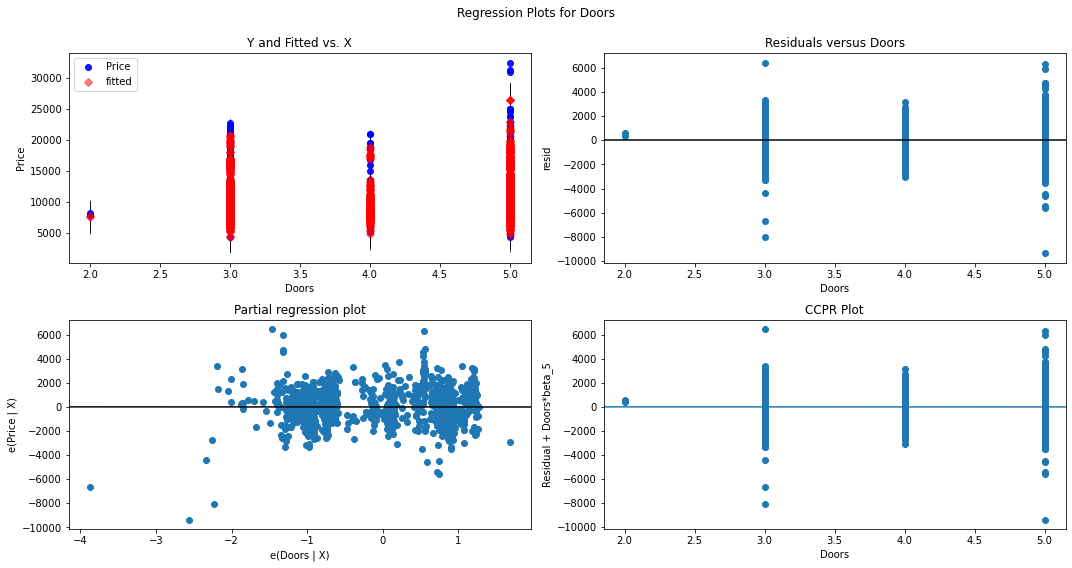

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel, "Doors", fig=fig)
plt.show()

In [34]:
#signifiant relation is not there with doors and price

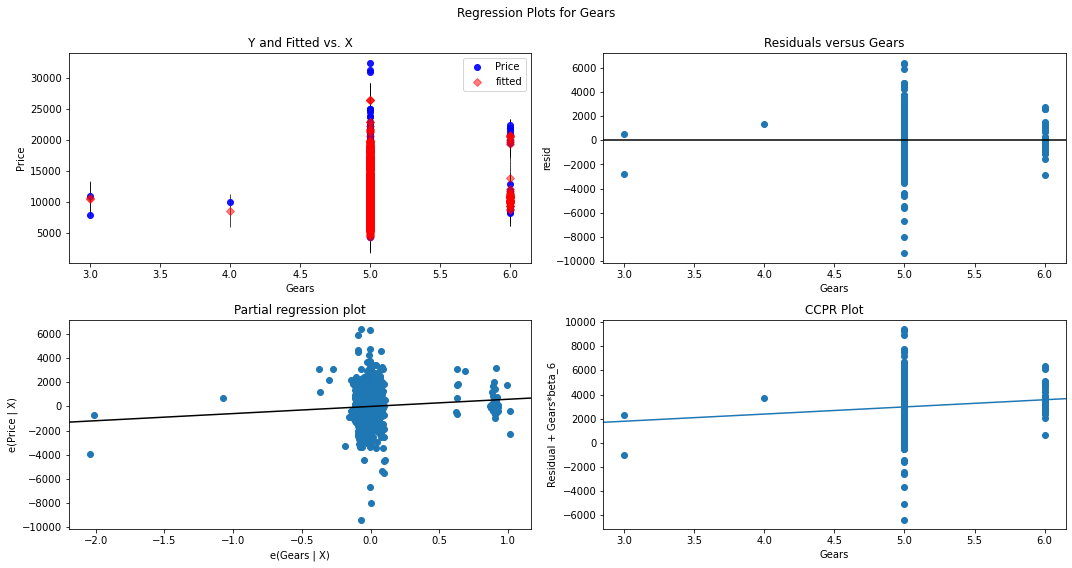

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel, "Gears", fig=fig)
plt.show()

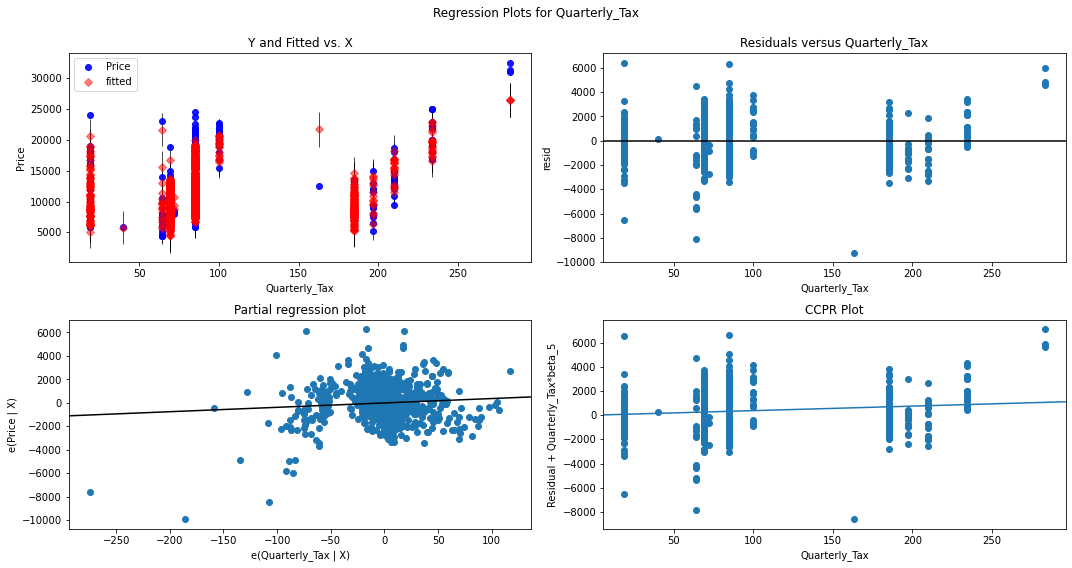

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel2, "Quarterly_Tax", fig=fig)
plt.show()

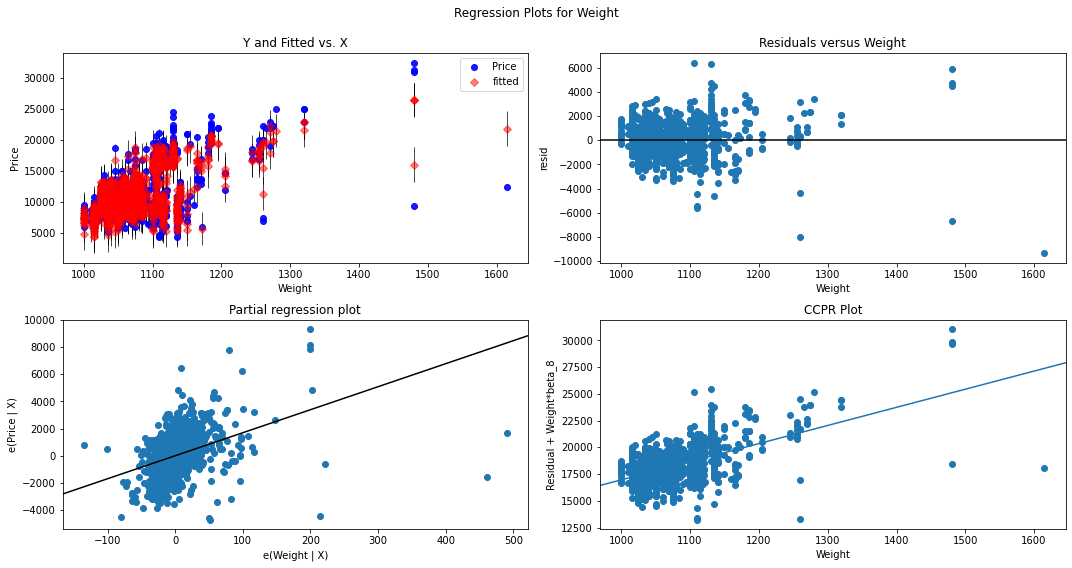

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotamodel, "Weight", fig=fig)
plt.show()

In [38]:
#Detection of the outliers

In [39]:
toyotamodel2_influence = toyotamodel2.get_influence() #np.round(c,3)
(c,_) = toyotamodel2_influence.cooks_distance


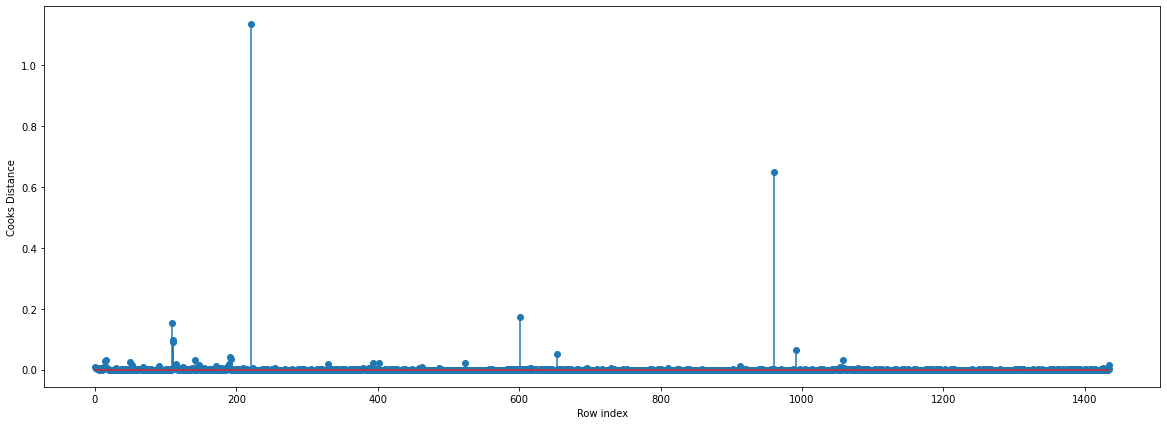

In [40]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [44]:
(np.argmax(c),np.max(c))

(221, 1.1365473823198669)

In [46]:
np.max(c)

1.1365473823198669

In [55]:
list(np.where(c>0.0208))

[array([  14,   16,   49,  109,  110,  111,  141,  191,  192,  221,  402,
         523,  601,  654,  960,  991, 1058], dtype=int64)]

In [57]:
# so outlier points are at index -  14,   16,   49,  109,  110,  111,  141,  191,  192,  221,  402, 523,  601,  654,  960,  991, 1058

In [60]:
toyotanew = toyota
toyotanew = toyotanew.drop(toyotanew.index[[14,16,   49,  109,  110,  111,  141,  191,  192,  221,  402,523,  601,  654,  960,  991, 1058]],axis=0)

In [61]:
toyotanew

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [63]:
toyotanewmodel = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=toyotanew).fit()

In [64]:
toyotanewmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1718.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:01:58   Log-Likelihood:                -12066.
No. Observations:                1419   AIC:                         2.415e+04
Df Residuals:                    1412   BIC:                         2.418e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.061e+04   1493.379     -7.104      0.000   -1.35e+04   -7680.118
Age_08_04      -116.2052      2.441    -47.596      0.000    -120.995    -111.416
KM               -0.0207      0.001    -18.173      0.000      -0.023      -0.018
HP               17.4718      2.719      6.425      0.000      12.137      22.806
Gears           508.8993    182.747      2.785      0.005     150.414     867.385
Quarterly_Tax    -3.8974      1.296     -3.007      0.003      -6.440      -1.355
Weight           23.5760      1.186     19.881      0.000      21.250      25.902
==============================================================================
Omnibus:                       33.479   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.244
Skew:                           0.121   Prob(JB):                     6.80e-15
Kurtosis:                       4.022   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Ajinkya Deshmukh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


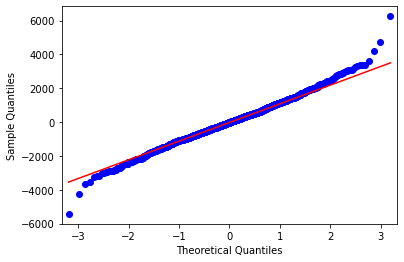

In [65]:
import statsmodels.api as sm
qqplot = sm.qqplot(toyotanewmodel.resid,line='q')
plt.show()

In [66]:
#test assumption 4 and assumption 2 in combination

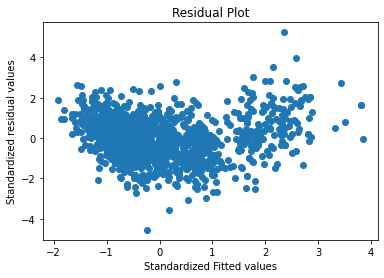

In [67]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(toyotanewmodel.fittedvalues),get_standardized_values(toyotanewmodel.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [68]:
# this is random plot we are getting so we can say that assumption 4 and 2 is satisfied as variance not changing and also 
# there is no need to check error vs seperate features as in combination it is not giving us any relation 

In [69]:
#Test Assumption no 5 as linear relation between y and features along with others

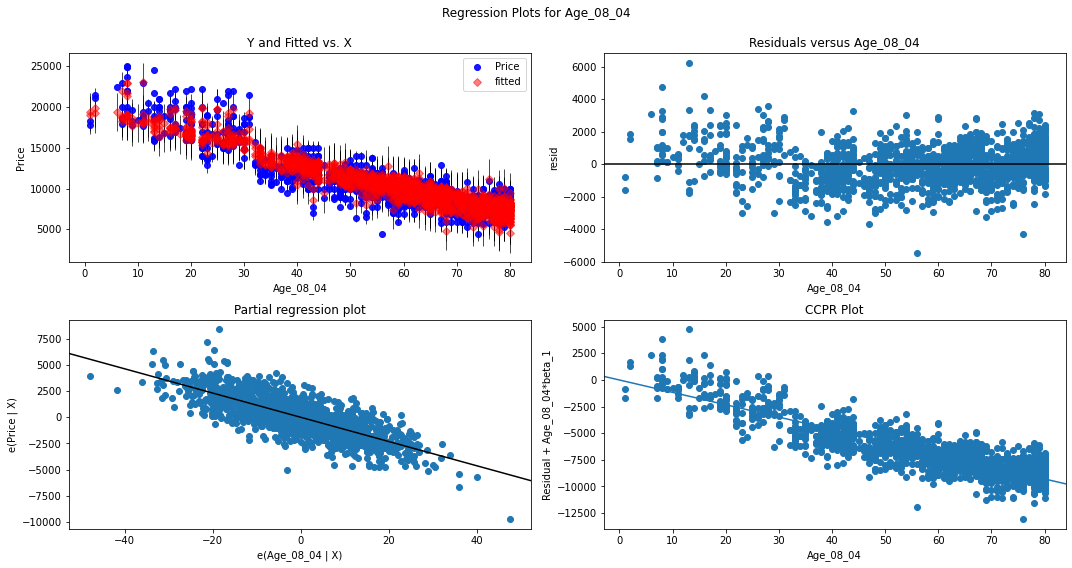

In [70]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotanewmodel, "Age_08_04", fig=fig)
plt.show()

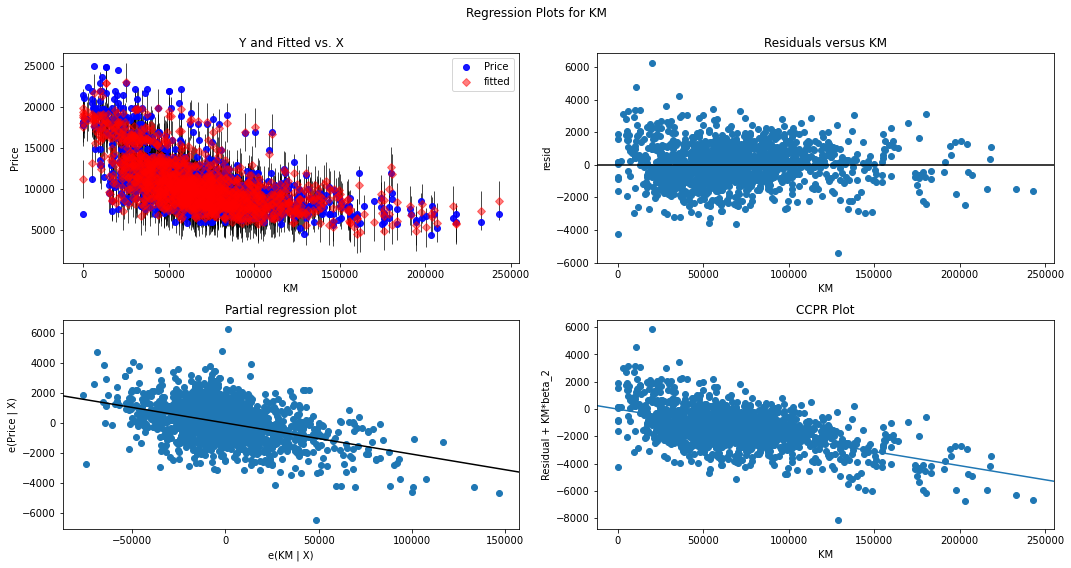

In [71]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotanewmodel, "KM", fig=fig)
plt.show()

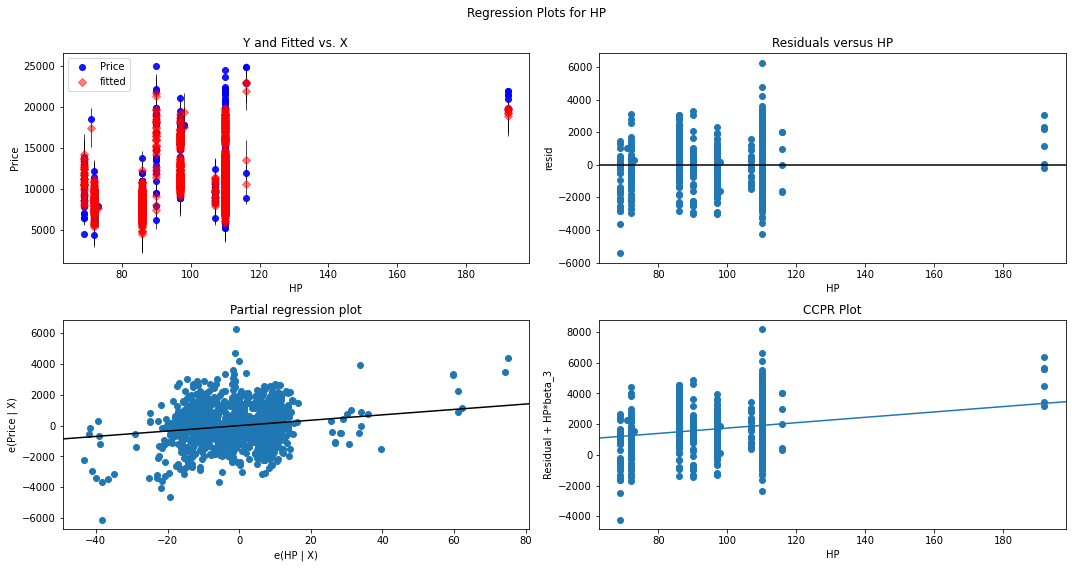

In [72]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotanewmodel, "HP", fig=fig)
plt.show()

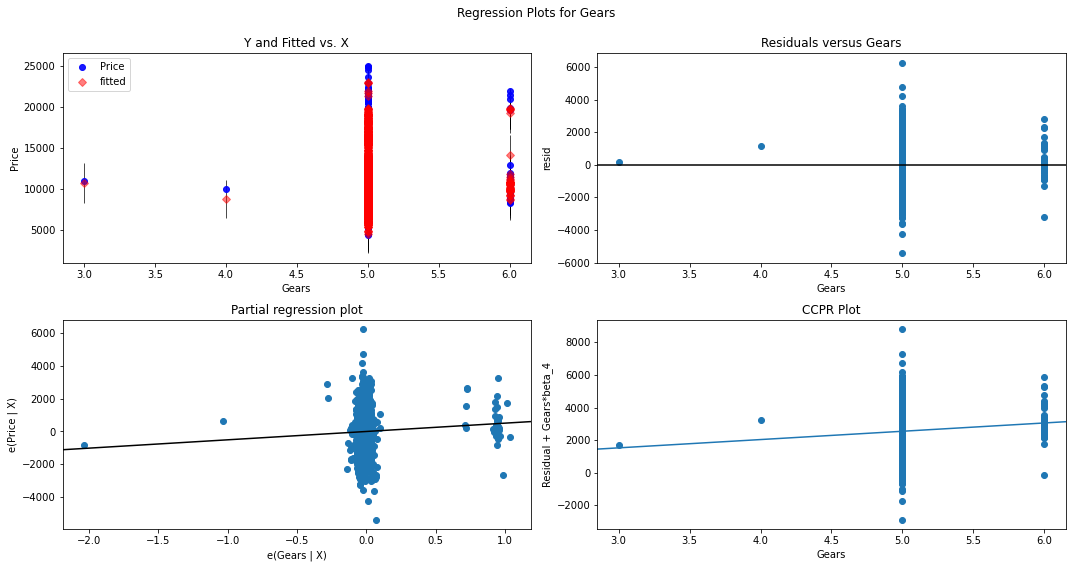

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotanewmodel, "Gears", fig=fig)
plt.show()

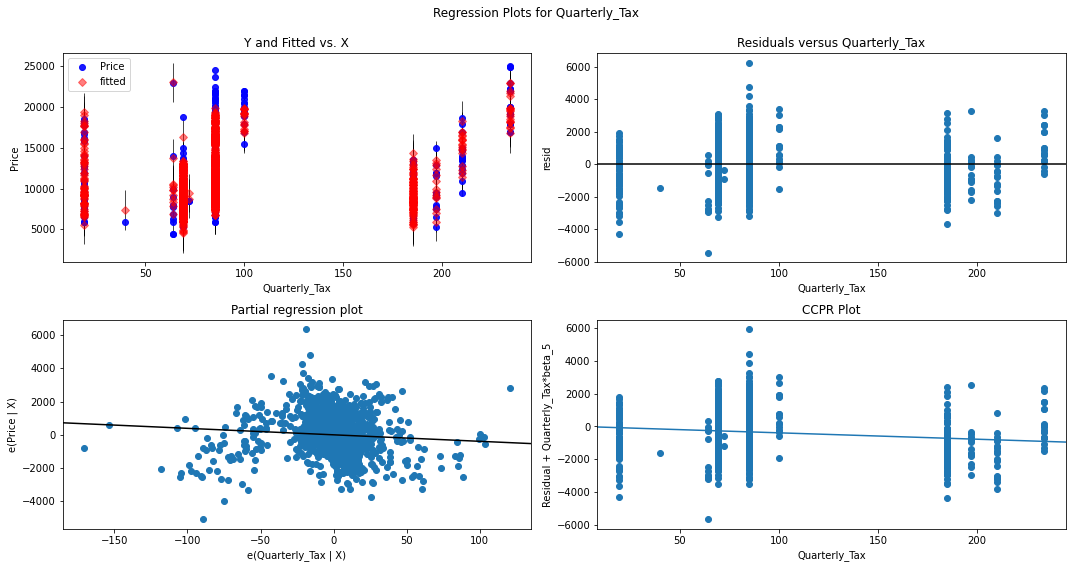

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotanewmodel, "Quarterly_Tax", fig=fig)
plt.show()

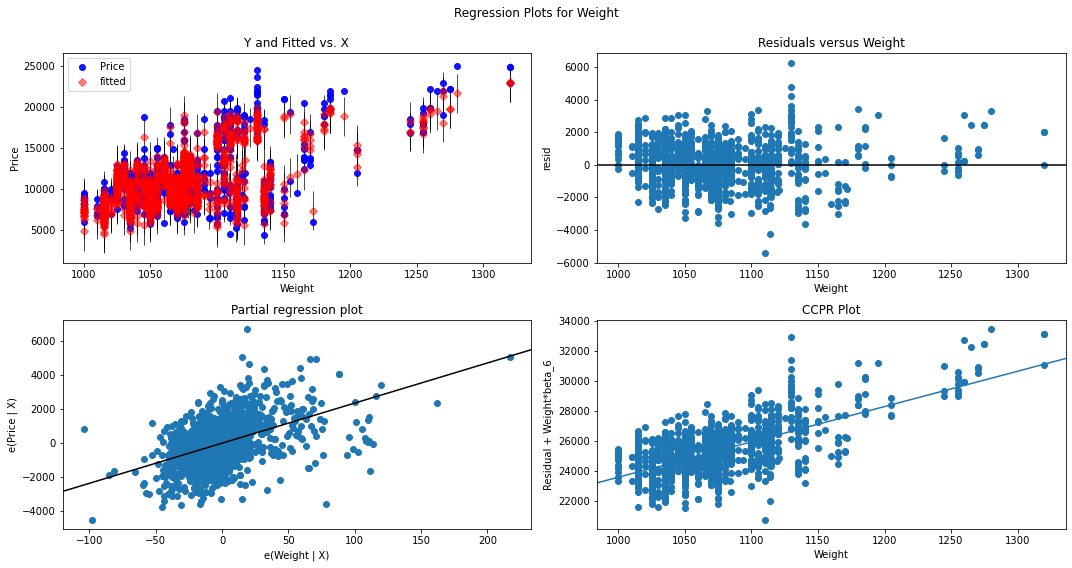

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(toyotanewmodel, "Weight", fig=fig)
plt.show()

In [83]:
# So this is the latest model i.e. toyotanewmodel